# Generating graph data

In [47]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interactive, fixed
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

***
## New generator

In [147]:
def generate_graph(generator_params, dist_params, num_features, connectivity):
    G = nx.empty_graph()

    for i, (n,p) in enumerate(generator_params):
        g = nx.fast_gnp_random_graph(n, p)
        nx.set_node_attributes(g, i, 'label')
        G = nx.disjoint_union(G,g)

    N = G.number_of_nodes()
    E = G.number_of_edges()

    n_random_edges = np.int32(connectivity*E)
    random_edges = [
        (np.random.randint(N), np.random.randint(N)) 
        for i in range(n_random_edges)
    ]

    G.add_edges_from(random_edges)

    node_mapping = dict(zip(G.nodes(), sorted(G.nodes(), key=lambda k: np.random.random())))
    G = nx.relabel_nodes(G, node_mapping)

    labels_shuffled = nx.get_node_attributes(G, 'label')

    A = nx.adj_matrix(G, nodelist=sorted(G.nodes()))
    new_G = nx.from_scipy_sparse_matrix(A)
    nx.set_node_attributes(new_G, labels_shuffled, 'label')

    features = {
        i: np.random.normal(loc=dist_params[c][0], scale=dist_params[c][1], size=num_features)
        for i, c in labels_shuffled.items()
    }
    nx.set_node_attributes(new_G, features, 'x')
    
    return new_G
    
    
def graph_info(G, colours, max_prints=10):
    N  = G.number_of_nodes()
    labels = nx.get_node_attributes(G, 'label')
    x = nx.get_node_attributes(new_G, 'x')
    plt.figure(figsize=(15,6))
    
    plt.subplot(1,2,1)
    plt.title('Generated graph')
    nx.draw(G, with_labels=True, 
            node_color=[colours[labels[i]] for i in np.arange(N)],
           )
    
    plt.subplot(1,2,2)
    plt.title('Adjacency matrix')
    sns.heatmap(nx.adj_matrix(G).todense())
    
    
    print('{:7} {:7} {:20}'.format('Node', 'Label', 'X'))
    print()
    for i in range(N):
        print('{:<7} {:<7} {:<20}'.format(i, labels[i], str(x[i])))
        if i==max_prints: break

Node    Label   X                   

0       0       [-0.27664658  0.04731864 -0.08513559]
1       3       [4.53486131 5.97371767 5.77504044]
2       0       [-0.77852519 -0.92969487 -1.00088914]
3       1       [5.29984357 5.42128885 4.98937475]
4       0       [5.22406887 5.42499379 6.21774574]
5       0       [3.95623311 5.40655795 4.39890049]
6       2       [4.10382361 5.49893904 3.77298086]
7       3       [5.39280708 5.3602606  6.5477499 ]
8       1       [6.45893897 5.04638123 4.72808303]
9       1       [-1.94929938 -0.60938705 -0.70343493]
10      0       [ 0.1642751  -1.53556116 -0.8479615 ]


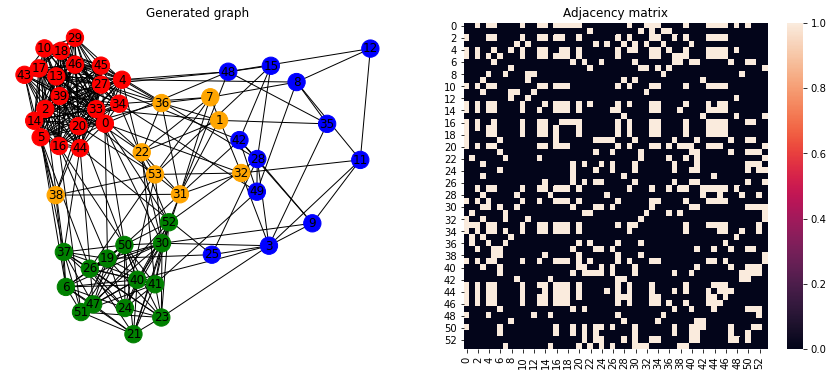

In [148]:
# list of (nodes, connectivity) tuples corresponding to each cluster
generator_params = [
    (20, 0.9),
    (12, 0.3),
    (14, 0.8),
    (8,0.5)
]

# list of (mean, variance) tuples corresponding to each cluster
dist_params = [
    (5, 0.9),
    (3, 0.4),
    (-1, 0.5),
    (0,0.1)
]

num_features = 3
connectivity = 0.3

colours = ['red', 'blue', 'green', 'orange', 'pink', 'yellow', 'gray']

g = generate_graph(generator_params, dist_params, num_features, connectivity)
graph_info(g, colours)